## Dane fizykochemiczne wykorzystane w symulacji

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp

In [ ]:
k_n = 1e7 # stała zarodkowania
k_g = 8.06e-9 # stała wzrostu
n = 4.2 # wykładnik przy prędkości zarodkowania
g = 2.0 # wykładnik przy prędkości wzrostu
diff_coef = 2.2e-9 # dyfuzyjność - taka sama dla każdej z substancji w układzie
henry = 3.46e-2 # stała Henryego w układzie, w którym występują jony
K_sp = 3.47e-3 # iloczyn rozpuszczalności
k_rxn = 12.4 # stała kinetyczna reakcji limitującej
cryst_den = 2.71 # gęstośćkryształu


In [ ]:
A_0 = 1 # Początkowe stężenie gazowego dwutlenku węgla
B_0 = 1 # Początkowe stężenie ciekłego reagenta - OH-
C_0 = 1 # Początkowe stężenie produktu CO3- 


  0%|          | 0/10.0 [00:00<?, ?it/s]

c:\Users\Nik0\AppData\Local\Programs\Python\Python39\lib\site-packages\pde\grids\boundaries\local.py:1822: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def virtual_point(


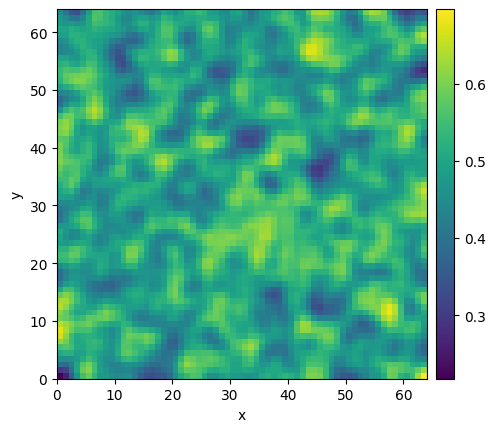

In [2]:
import pde

grid = pde.UnitGrid([64, 64])                 # generate grid
state = pde.ScalarField.random_uniform(grid)  # generate initial condition

eq = pde.DiffusionPDE(diffusivity=0.1)        # define the pde
result = eq.solve(state, t_range=10)          # solve the pde
result.plot() 